<a href="https://colab.research.google.com/github/Many98/01NAEX/blob/main/01NAEX_HW2_TEAM_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01NAEX - Homework 2: Matrix multiplication problem
TEAM:
* Frátrik Emanuel
* Kysilka Lukáš
* Nguyenová Thi Thu Hien
* Ruženikov Jurij
* Stojaspal Pavel



In [1]:
cat(system('sudo apt-get install -y gmp', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y partitions', intern=TRUE), sep = "\n")
cat(system('sudo apt-get install -y DoE.base', intern=TRUE), sep = "\n")

list_of_packages <- c("tidyverse","MASS", "lattice", "FrF2") # "agricolae","nortest","lattice","pwr",
missing_packages <- list_of_packages[!(list_of_packages %in% installed.packages()[,"Package"])]
missing_packages
if(length(missing_packages)) install.packages(missing_packages)
lapply(list_of_packages, library, character.only = TRUE)

Warning message in system("sudo apt-get install -y gmp", intern = TRUE):
“running command 'sudo apt-get install -y gmp' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...


Warning message in system("sudo apt-get install -y partitions", intern = TRUE):
“running command 'sudo apt-get install -y partitions' had status 100”


Reading package lists...
Building dependency tree...
Reading state information...
Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-gmp r-cran-lmtest r-cran-mathjaxr
  r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets r-cran-vcd
  r-cran-zoo
The following NEW packages will be installed:
  r-cran-combinat r-cran-conf.design r-cran-doe.base r-cran-gmp r-cran-lmtest
  r-cran-mathjaxr r-cran-numbers r-cran-partitions r-cran-polynom r-cran-sets
  r-cran-vcd r-cran-zoo
0 upgraded, 12 newly installed, 0 to remove and 5 not upgraded.
Need to get 7,313 kB of archives.
After this operation, 13.2 MB of additional disk space will be used.
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/main amd64 r-cran-co

[1] "FrF2"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sfsmisc’, ‘scatterplot3d’, ‘igraph’


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select


Loading required package: DoE.base

Loading required package: grid

Loading required package: conf.design

Registered S3 method overwritten by 'DoE.base':
  method           from       
  factorize.factor conf.design


Attaching package: ‘DoE.base’


Th

[[1]]
 [1] "forcats"   "stringr"   "dplyr"     "purrr"     "readr"     "tidyr"    
 [7] "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics"  "grDevices"
[13] "utils"     "datasets"  "methods"   "base"     

[[2]]
 [1] "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"     "readr"    
 [7] "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"     "graphics" 
[13] "grDevices" "utils"     "datasets"  "methods"   "base"     

[[3]]
 [1] "lattice"   "MASS"      "forcats"   "stringr"   "dplyr"     "purrr"    
 [7] "readr"     "tidyr"     "tibble"    "ggplot2"   "tidyverse" "stats"    
[13] "graphics"  "grDevices" "utils"     "datasets"  "methods"   "base"     

[[4]]
 [1] "FrF2"        "DoE.base"    "conf.design" "grid"        "lattice"    
 [6] "MASS"        "forcats"     "stringr"     "dplyr"       "purrr"      
[11] "readr"       "tidyr"       "tibble"      "ggplot2"     "tidyverse"  
[16] "stats"       "graphics"    "grDevices"   "utils"       "datasets"   
[21] "methods"     "base"

In [ ]:
tibble::tibble(
  Package = names(installed.packages()[,3]),
  Version = unname(installed.packages()[,3])
)

Package,Version
<chr>,<chr>
FrF2,2.2-3
igraph,1.3.5
IRdisplay,1.1
IRkernel,1.3.1
pbdZMQ,0.3-8
repr,1.1.4
scatterplot3d,0.3-42
sfsmisc,1.1-14
askpass,1.1


# 0. Decide how you will determine the low and high levels for each variable. What data will you record. 

* Temperature: 20 or 30
* Implementation: 0 = custon multiplication, 1 = with library numpy
* Dtype: 0 = int, 1 = float
* Internet: 0 = internet on, 1 = internet off
* Performance is performance of RAM in GB: 3.5 or 5.6
* Range: 10 or 10 000
* Size: 50 or 150
* Sparsity: 20% or 80%	

# 1. What are the generators used in the design and why did you choose them? $2^{8-2}$ design.

  If we label the factors as follows:

*   implementation - A
*   sparsity - B
*   range	- C
*   dtype	- D
*   size - E	
*   ram - F	
*   internet	- G
*   temperature - H 

The chosen generators are: 
 - G = ABCD, H = ABEF

Therefore defining relation is:

 - I = ABCDG = ABEFH = CDEFGH.

The choice was made under assumpiton that the factors G and H will not have any effect on time.


A(ABCD) = BCD = BEG = ACDEG
B(ABCD) = ACD = AEG = BCDEG
C(ABCD) = 
  
Resolution is of type V.

If you have multiple operators, is the effect of this nuisance factor in the representation with any effect of interest?
  
We do not use blocking.

What is the alternative division (alternative generators)?

Alternative generators are G = -ABCD, H = -ABEF.

In [3]:
data <- read.csv("data.csv")
data <- data %>% rename(dtype = set,
                       implementation = multiply,
                       ram = performance) %>%
        mutate(dtype = recode(dtype, '0' = "int",
         '1' = "float",
         ),
         implementation = recode(implementation, '0' = "custom",
         '1' = "numpy",
         )
     ) %>% mutate(implementation = as.factor(implementation), 
                  dtype = as.factor(dtype), 
                  ram = as.factor(ram),
                  size = as.factor(size),
                  range = as.factor(range),
                  sparsity = as.factor(sparsity),
                  temperature = as.factor(temperature),
                  internet = as.factor(internet),
                  time=time)
# Added relocation of temperature and internet to the end of df. 
# This might not seem important, but will result in correct factorial design further.


# mapping for backward compability
data_mapping <- data %>% 
        mutate(dtype = recode(dtype, 'int' = '-1', 'float' = '1'),
               implementation = recode(implementation, 'custom' = '-1', 'numpy' = '1'),
               ram = recode(ram, '3.5' = '-1', '5.6' = '1'),
               size = recode(size, '50' = '-1', '150' = '1'),
               range = recode(range, '10' = '-1', '100000' = '1'),
               sparsity = recode(sparsity, '0.2' = '-1', '0.8' = '1'),
               temperature = recode(temperature, '20' = '-1', '30' = '1'),
               internet = recode(internet, '1' = '-1','0' = '1')
               )
               
#data <- subset(data, select = -c(1)) %>% 
#    relocate(temperature,internet, .after = implementation)

head(data,5)
head(data_mapping, 5)

,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,20,3.5,0,50,int,10,0.2,custom,0.1042239666
2,2,20,3.5,0,50,int,10,0.2,numpy,0.0001533031
3,3,20,3.5,0,50,int,10,0.8,custom,0.1042015553
4,4,20,3.5,0,50,int,10,0.8,numpy,0.0001530647
5,5,20,3.5,0,50,int,100000,0.2,custom,0.1060976982


,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,-1,-1,1,-1,-1,-1,-1,-1,0.1042239666
2,2,-1,-1,1,-1,-1,-1,-1,1,0.0001533031
3,3,-1,-1,1,-1,-1,-1,1,-1,0.1042015553
4,4,-1,-1,1,-1,-1,-1,1,1,0.0001530647
5,5,-1,-1,1,-1,-1,1,-1,-1,0.1060976982


In [5]:

# Creating 1/4 factorial design
design =FrF2(2^(8-2), 8, replications = 1, randomize = FALSE,
generators=c("ABCD","ABEF"), 
factor.names = c("implementation", "sparsity", "range",
                 "dtype", "size", "ram","internet", "temperature")
                 )

# Extracting time from original data using `data_mapping`
correct_data = data_mapping[data_mapping$temperature == design$temperature & 
                            data_mapping$internet == design$internet, ]


# Adding response to the design
time = correct_data$time
design = add.response(design, time)

# BUT RESPONSE IS STILL WRONGLY MAPPED
design$implementation = correct_data$implementation
design$sparsity= correct_data$sparsity
design$range = correct_data$range
design$dtype = correct_data$dtype
design$size = correct_data$size
design$ram = correct_data$ram
design$internet = correct_data$internet
design$temperature = correct_data$temperature

# NOW ORDER OF EXPERIMENTS IS NOT CORRECT BUT FEATURES ARE CORRECTLY MAPPED
#  TO RESPONSE

summary(design)
design


Call:
FrF2(2^(8 - 2), 8, replications = 1, randomize = FALSE, generators = c("ABCD", 
    "ABEF"), factor.names = c("implementation", "sparsity", "range", 
    "dtype", "size", "ram", "internet", "temperature"))

Experimental design of type  FrF2.generators 
64  runs

Factor settings (scale ends):
  implementation sparsity range dtype size ram internet temperature
1             -1       -1    -1    -1   -1  -1       -1          -1
2              1        1     1     1    1   1        1           1

Responses:
[1] time

Design generating information:
$legend
[1] A=implementation B=sparsity       C=range          D=dtype         
[5] E=size           F=ram            G=internet       H=temperature   

$generators
[1] G=ABCD H=ABEF


Alias structure:
[[1]]
[1] no aliasing among main effects and 2fis



,implementation,sparsity,range,dtype,size,ram,internet,temperature,time
,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,1,-1,1,-1,-1,-1,1,-1,1.595020e-04
2,-1,1,1,-1,-1,-1,1,-1,1.035061e-01
3,1,-1,-1,1,-1,-1,1,-1,1.978874e-05
4,-1,1,-1,1,-1,-1,1,-1,9.313273e-02
5,-1,-1,-1,-1,1,-1,1,-1,2.849526e+00
6,1,1,-1,-1,1,-1,1,-1,3.945589e-03
7,-1,-1,1,1,1,-1,1,-1,2.100054e+00
8,1,1,1,1,1,-1,1,-1,1.938343e-04
9,-1,-1,1,-1,-1,-1,-1,-1,8.871007e-02


In [6]:
correct_data

,X,temperature,ram,internet,size,dtype,range,sparsity,implementation,time
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
6,6,-1,-1,1,-1,-1,1,-1,1,1.595020e-04
7,7,-1,-1,1,-1,-1,1,1,-1,1.035061e-01
10,10,-1,-1,1,-1,1,-1,-1,1,1.978874e-05
11,11,-1,-1,1,-1,1,-1,1,-1,9.313273e-02
17,17,-1,-1,1,1,-1,-1,-1,-1,2.849526e+00
20,20,-1,-1,1,1,-1,-1,1,1,3.945589e-03
29,29,-1,-1,1,1,1,1,-1,-1,2.100054e+00
32,32,-1,-1,1,1,1,1,1,1,1.938343e-04
37,37,-1,-1,-1,-1,-1,1,-1,-1,8.871007e-02


# 2. Count the individual effects.

In [7]:
lm_for_coeffs <- lm(time~temperature*ram*internet*size*dtype*range*sparsity*implementation,
                  data=correct_data)
effects <-as.data.frame(2*lm_for_coeffs$coefficients)
names(effects)[1] <- 'Effects'
effects

,Effects
,<dbl>
(Intercept),0.20804414
temperature1,0.18033966
ram1,1.16968745
internet-1,-0.04948482
size1,4.19511399
dtype-1,0.22286910
range1,-0.20305103
sparsity1,-0.02177867
implementation1,-0.20800456


# 3. Find out what factors and their interactions appear significant (use daniel and pareto plot)
    Create main effects plot, interaction plot, boxplots.
    TODO: What can be inferred from the data? Comment carefully. If you know another useful visualization of the measured values, do it.

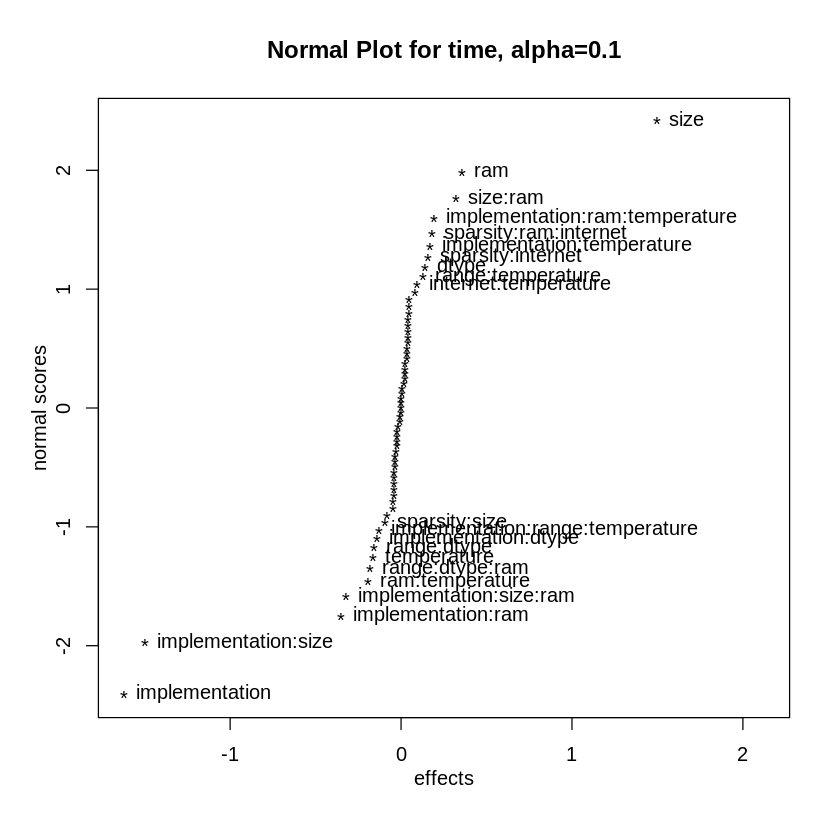

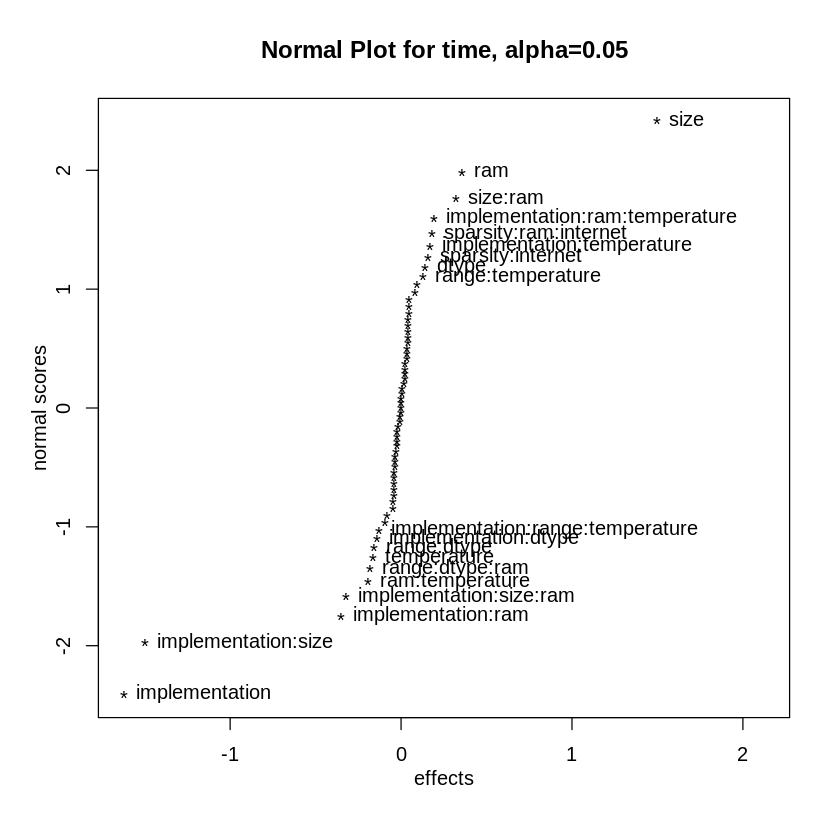

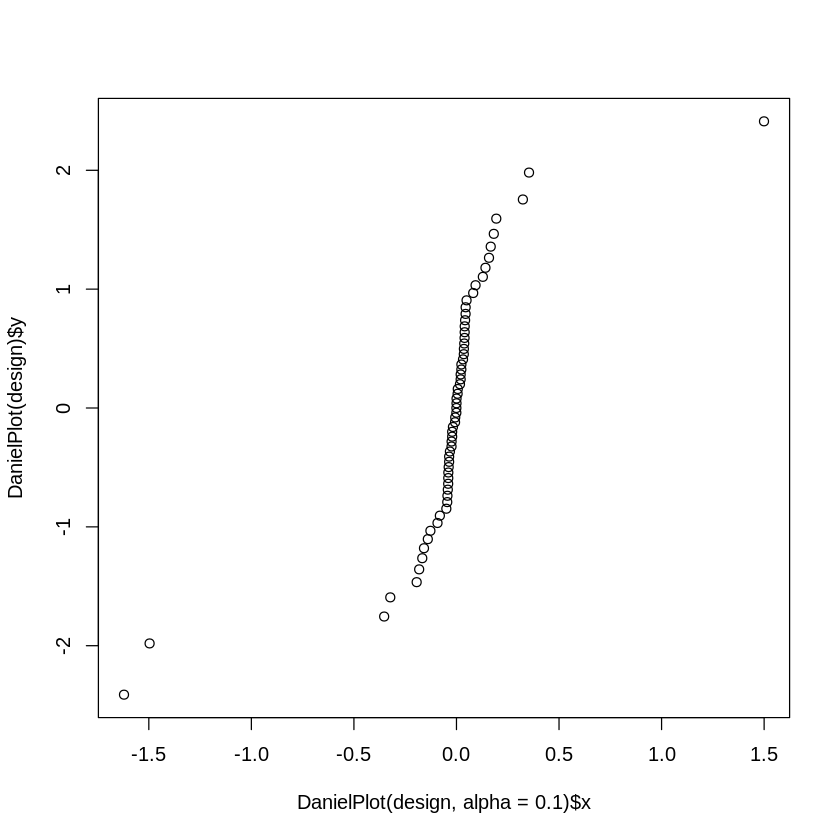

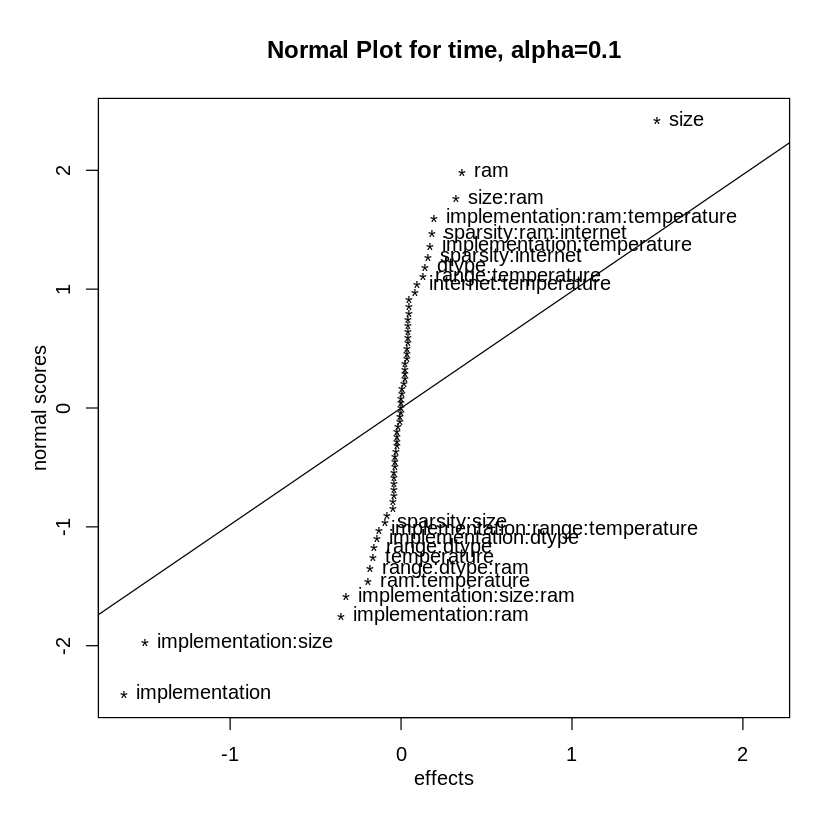

In [8]:
# Daniel plot
qqplot(DanielPlot(design,alpha=0.1)$x,DanielPlot(design)$y)
qqline(DanielPlot(design,alpha=0.1)$y)

Factors with significant influence on resulting time should deviate from normal plot line. Therefore according to this plot we can expect factors implementation, size, ram and intercations between implementation and size and size and ram to have most significant effect on resulting time but prior to draw any conclusions we need to perform anova analysis.

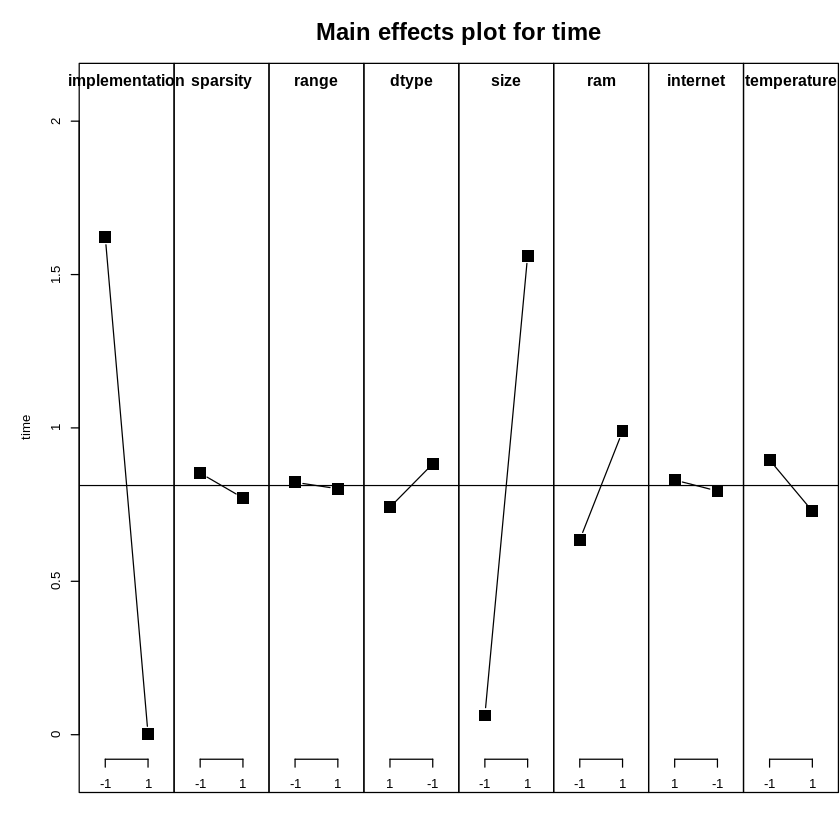

In [9]:
# main effects plot
MEPlot(design)

Main effect plot suggests that implementation and size have highest effect on resulting time. It seems that ram and temperature can be influential as well.

In [ ]:
# design %>% 
#   group_by(range) %>% 
#   summarise(mean_time = mean(time))
# data %>% 
#   group_by(internet) %>% 
#   summarise(mean_time = mean(time))

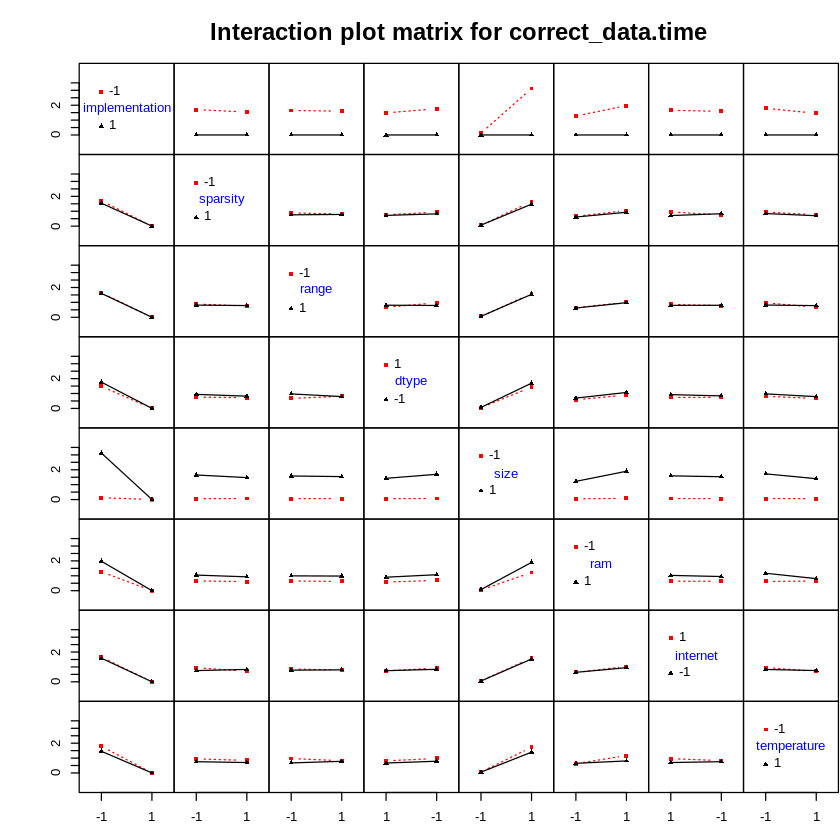

In [114]:
# interaction plot
IAPlot(design)

According to interaction plot there could be intercation between size of matrix and implementation used. Significance of this 2nd order interaction will be evaluated using anova...

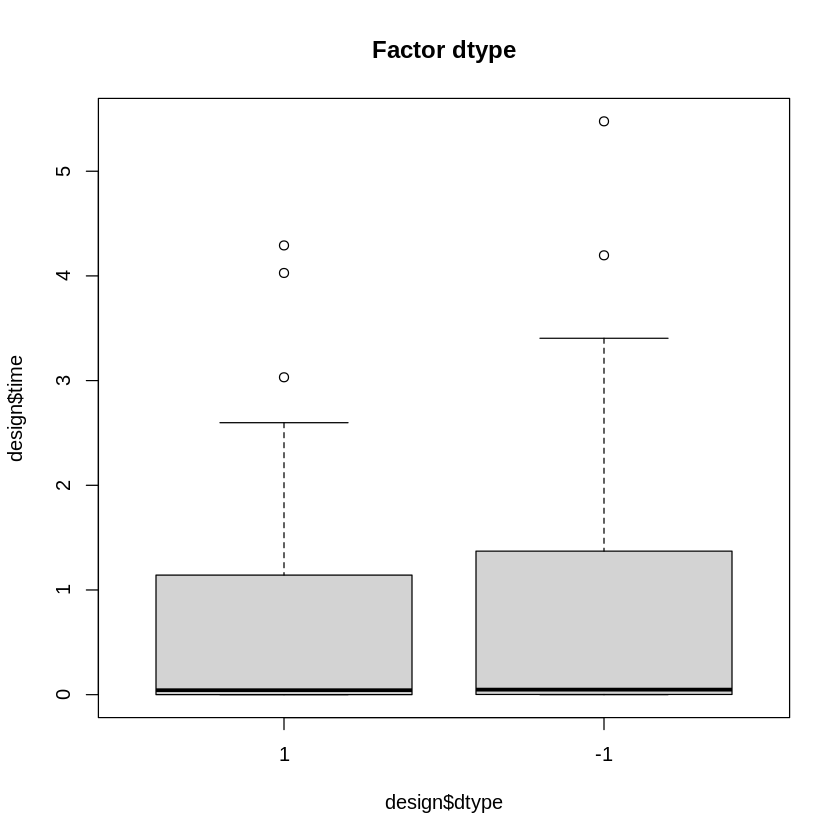

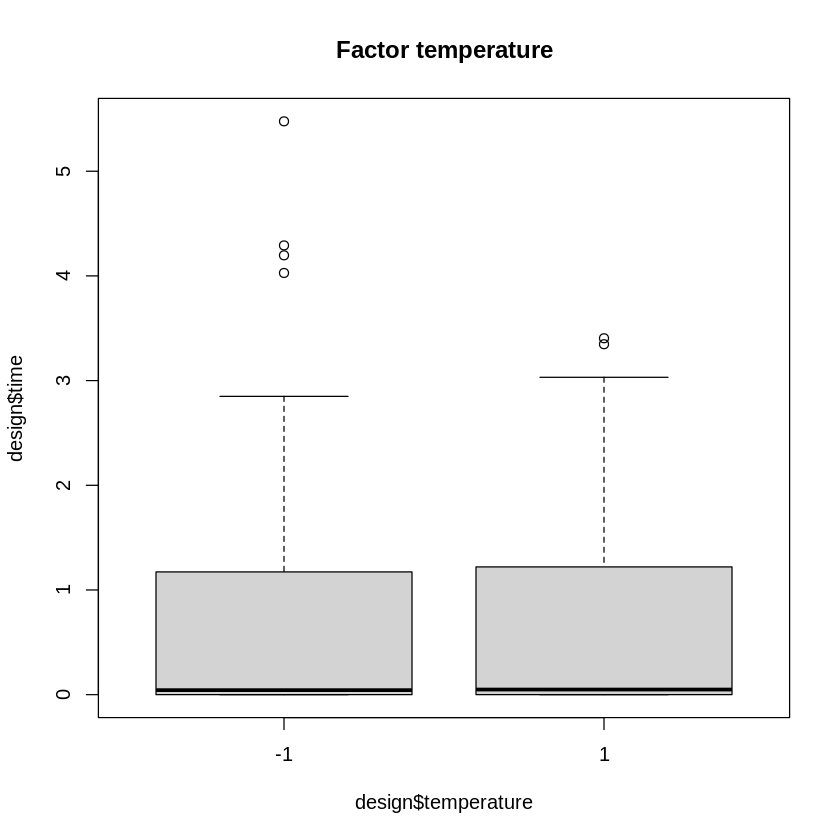

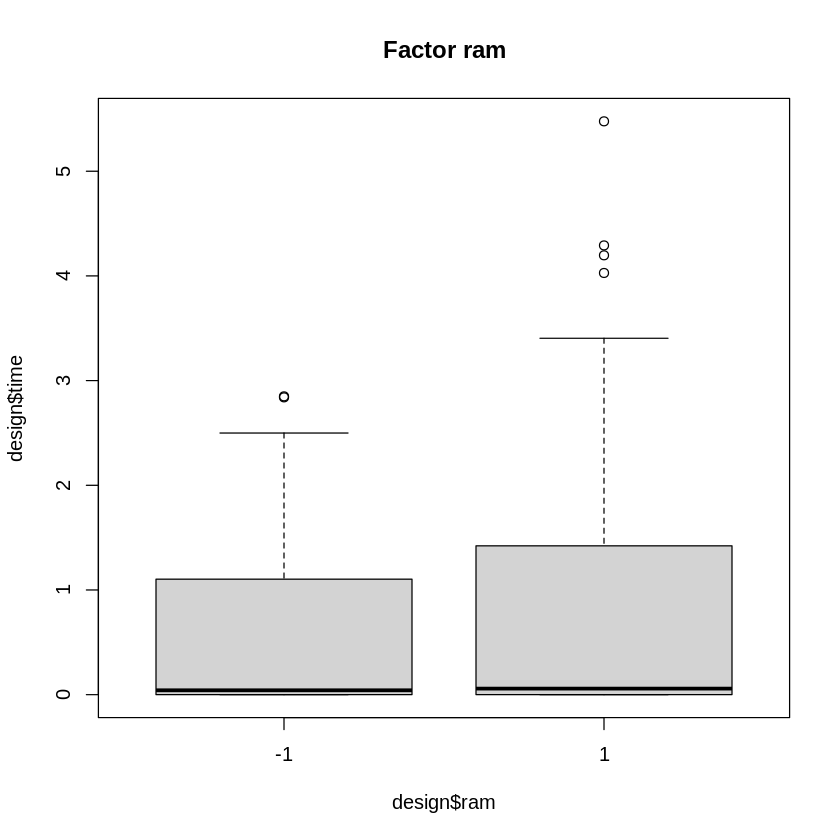

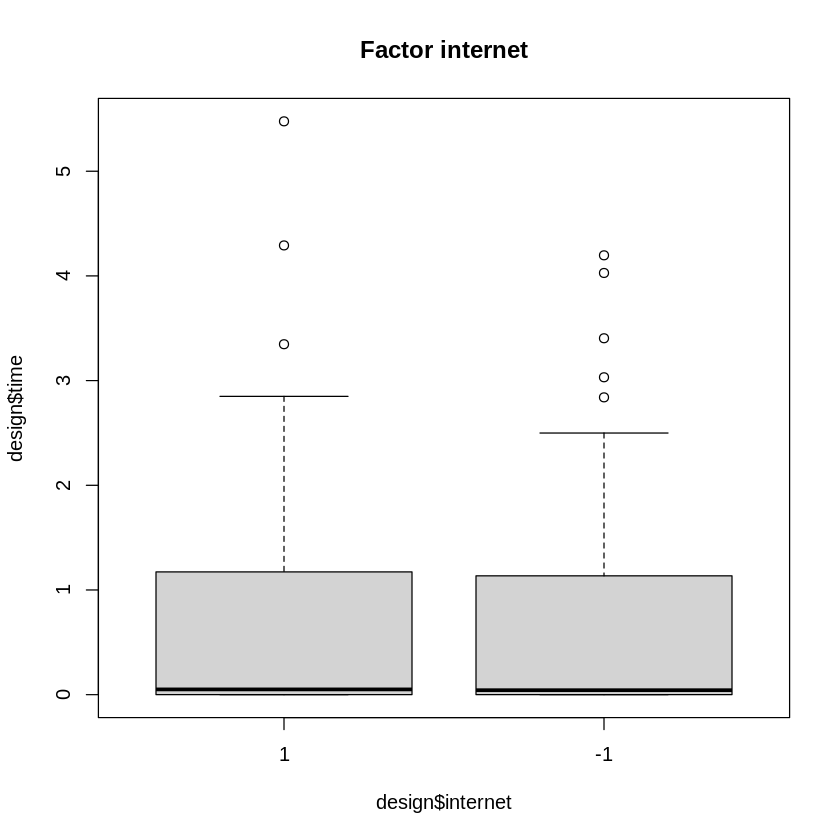

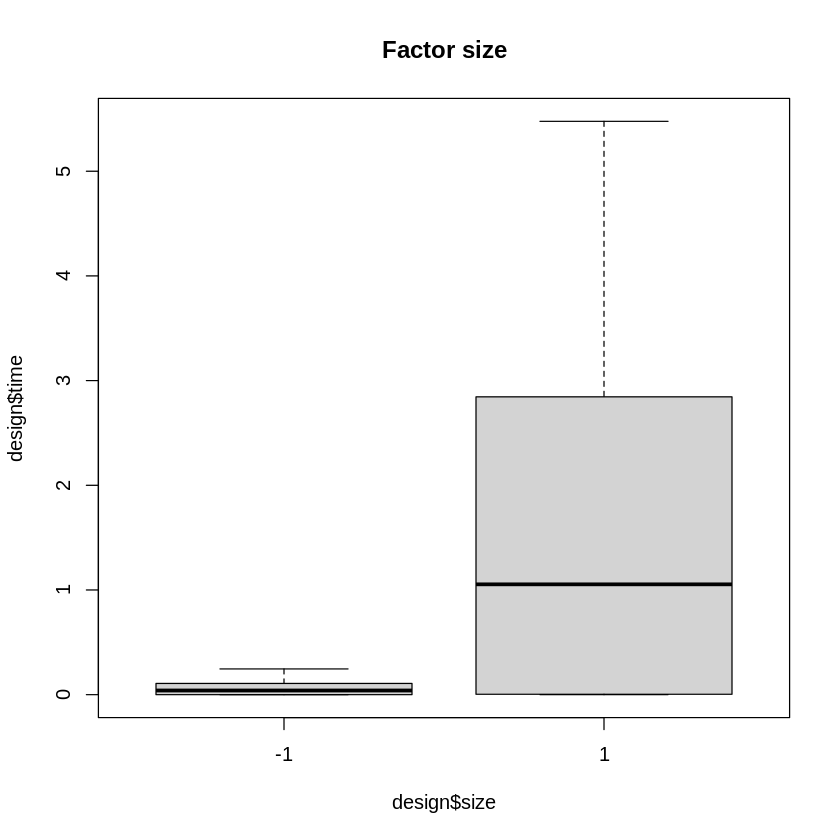

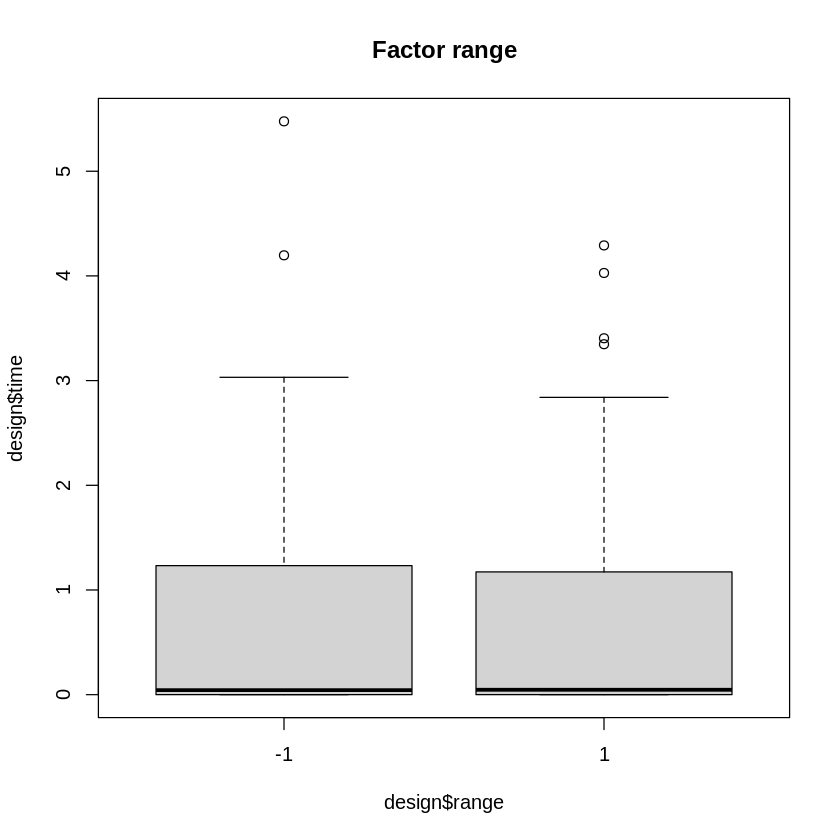

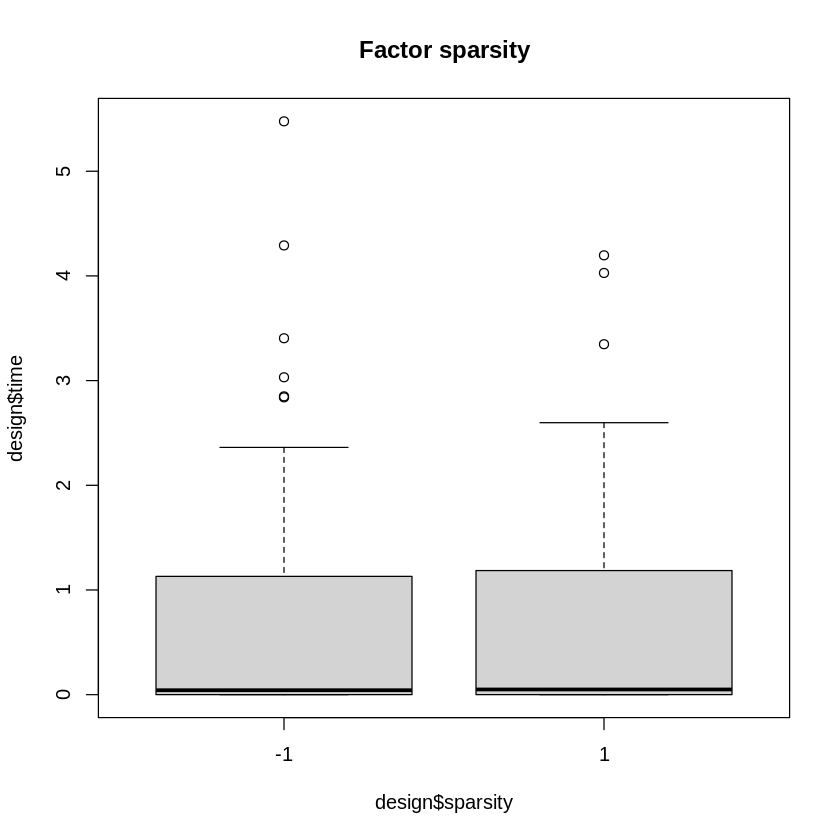

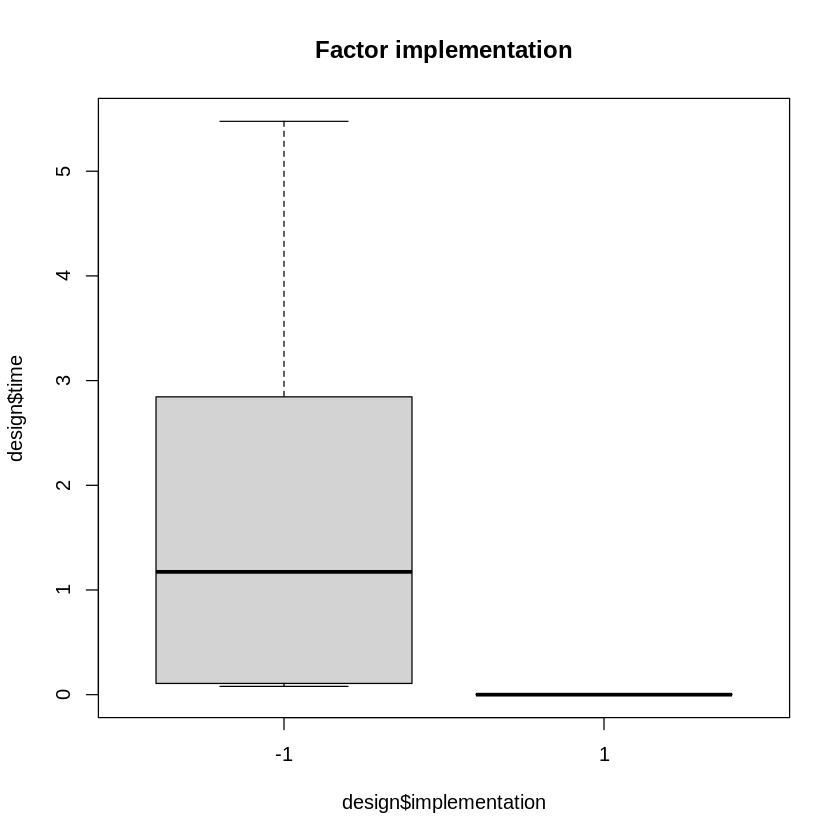

In [10]:
# boxplot
boxplot(design$time ~ design$dtype, main = "Factor dtype")
boxplot(design$time ~ design$temperature, main = "Factor temperature")
boxplot(design$time ~ design$ram, main = "Factor ram")
boxplot(design$time ~ design$internet, main = "Factor internet")
boxplot(design$time ~ design$size, main = "Factor size")
boxplot(design$time ~ design$range, main = "Factor range")
boxplot(design$time ~ design$sparsity, main = "Factor sparsity")
boxplot(design$time ~ design$implementation, main = "Factor implementation")

# 4. Perform analysis of variance, find and validate the resulting model without center point.

In [11]:
# Resolution V factorial design means that 3 way interactions are aliased
# with 2 way interactions, hence we can't estimate them. 
#Any higher interaction is then also aliased.
# Final model:
summary(aov(time~(implementation+dtype+size+ram)^2-dtype:ram, data=design))


                     Df Sum Sq Mean Sq F value   Pr(>F)    
implementation        1  42.04   42.04 323.286  < 2e-16 ***
dtype                 1   0.32    0.32   2.458 0.122780    
size                  1  35.97   35.97 276.594  < 2e-16 ***
ram                   1   2.00    2.00  15.392 0.000249 ***
implementation:dtype  1   0.31    0.31   2.402 0.127034    
implementation:size   1  35.82   35.82 275.425  < 2e-16 ***
implementation:ram    1   1.99    1.99  15.294 0.000259 ***
dtype:size            1   0.26    0.26   2.034 0.159569    
size:ram              1   1.68    1.68  12.898 0.000711 ***
Residuals            54   7.02    0.13                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

# 5. Use additional assumptions and additional measurements at the centres, 
     and confirm or reject assumption of the linear dependence in the numerical variables.

# 6. Construct a regression model where you convert the coded quantitative variables to actual numerical values    (use the other variables according to their significance).

In [ ]:
data <- read.csv("data.csv")

In [ ]:
data <- data %>% transmute(temperature = as.numeric(temperature),
                           performance = as.numeric(performance),
                           internet = as.factor(internet),
                           size = as.numeric(size),
                           set = as.factor(set),
                           range = as.numeric(range),
                           sparsity = as.numeric(sparsity),
                           multiply = as.factor(multiply),
                           time = as.numeric(time))

Nastavili jsme proměnné na kvantitativní kromě internetu, dtype a typu součinu. Do modelu jsme dali všechny proměnné, které jsou významné podle MEplotu.

In [ ]:
model = lm(time ~ temperature*performance*size*set*multiply - internet*range*sparsity,data = data)
summary(model)


Call:
lm.default(formula = time ~ temperature * performance * size * 
    set * multiply - internet * range * sparsity, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.41547 -0.00116  0.00000  0.00094  0.90615 

Coefficients:
                                              Estimate Std. Error t value
(Intercept)                                  2.195e+00  1.140e+00   1.925
temperature                                 -9.837e-02  4.472e-02  -2.200
performance                                 -9.343e-01  2.442e-01  -3.826
size                                        -4.895e-02  1.020e-02  -4.799
set1                                         5.181e-01  1.613e+00   0.321
multiply1                                   -2.192e+00  1.613e+00  -1.359
temperature:performance                      2.690e-02  9.578e-03   2.808
temperature:size                             2.157e-03  4.000e-04   5.392
performance:size                             2.062e-02  2.184e-03   9.440
tempera

The significant variables are...

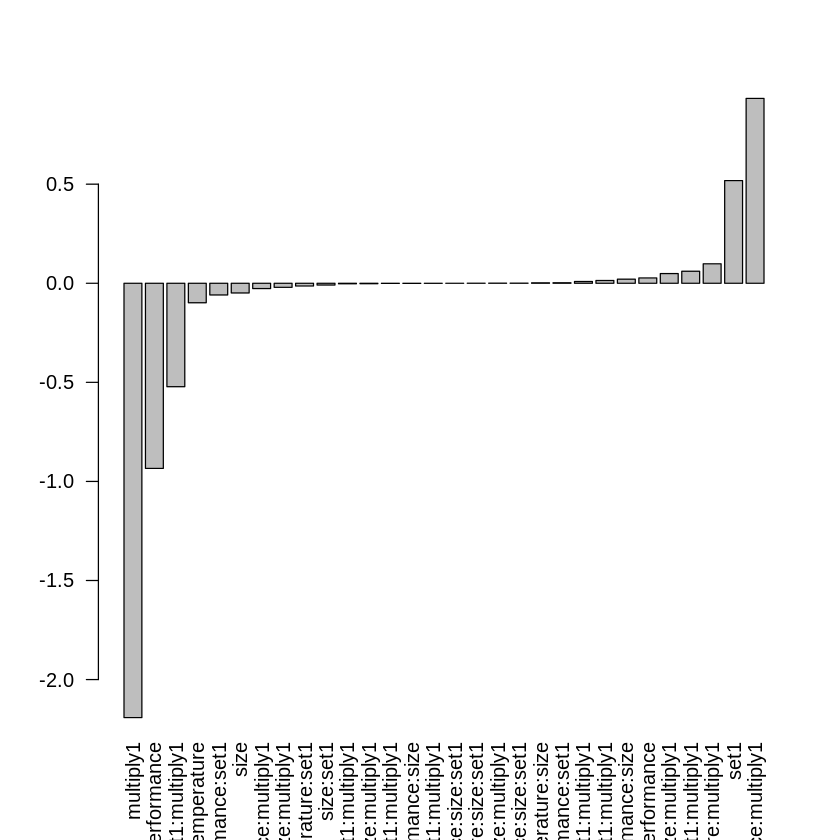

In [ ]:
barplot(sort(model$coeff[2:(2^5-1)]),las = 2)

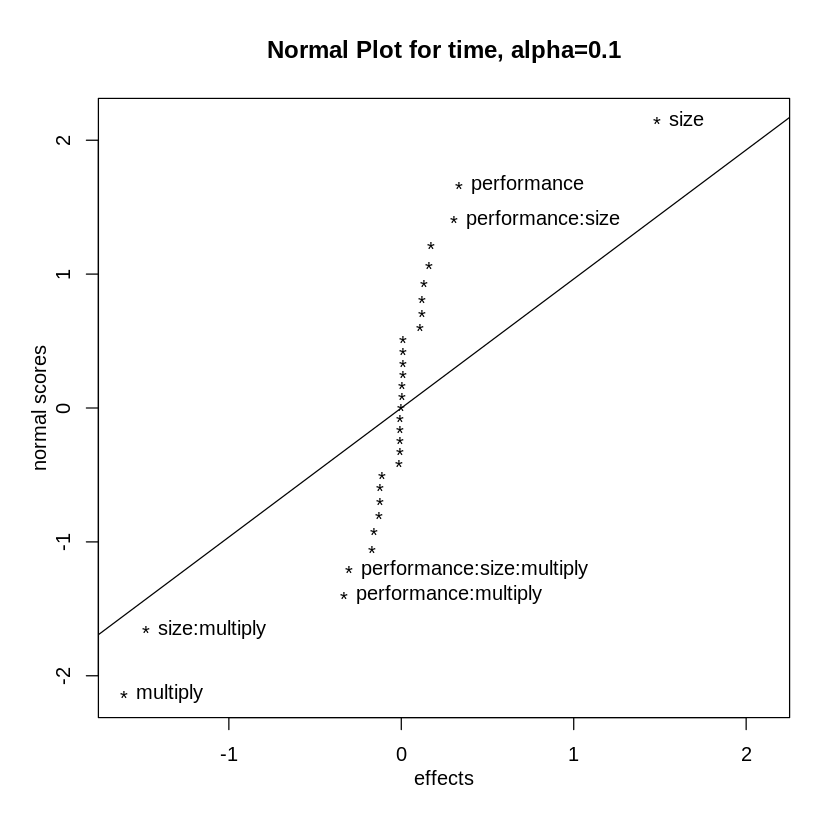

In [ ]:
qqline(DanielPlot(model,alpha=0.1)$y)

In [ ]:
install.packages("qualityTools") 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘qualityTools’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [ ]:
rate_pareto = fracDesign(k = 4, replicates = 1)
response(rate_pareto) = data$time[rate_pareto[,1]]
paretoPlot(rate_pareto)

ERROR: ignored

In [ ]:
modelup = lm(time ~ multiply + size:multiply + performance:multiply + performance:size:multiply + performance:size + performance + size, data=data)
summary(modelup)

In [ ]:
anova(model,modelup)

# 7. Use a regression model with at least two numerical variables (even if they are less significant). Plot a contour plot for the two quantitative variables and find the optimal values (maximum/minimum response) in intervals increased by 10% compared to the extreme values from the experimental design. In the contour plot, use actual values instead of code values.

Vybrali jsme kvantitatnivní proměnné performance a size, které se jeví v naší dosavadní analýze významné.

In [ ]:
rate.lm <- lm(time ~ performance*size, data)

In [ ]:
tmp <- list(performance=seq(3.1,6.2,by=.05),size=seq(45,165,by=0.5),data=data)
new.data <- expand.grid(tmp)
new.data$time <- predict(rate.lm,new.data)

In [ ]:
contourplot(time ~ performance*size, new.data, xlab="A performance",ylab="B size",main="Contour plot of Time Rate")

In [ ]:
summary(rate.lm)

In [ ]:
int = rate.lm$coefficients[1]
b1 = rate.lm$coefficients[2]
b2 = rate.lm$coefficients[3]
b3 = rate.lm$coefficients[4]

In [ ]:
y = int + b1*new.data$performance + b2*new.data$size + b3*new.data$performance*new.data$size

In [ ]:
y

In [ ]:
model3 = lm(time ~ performance*size, data=data)
x=seq(3.1,6.2,by=0.2)
y=seq(45,165,by=1)
f = function(x,y){
    new.x=data.frame(x1=x,x2=y)
    colnames(new.x) <- c("performance","size")

    predict(model3,new.x)
}
z = outer(x,y,f)
persp(x,y,z,theta=30,phi=30,expand=0.5,col="lightblue", xlab="performance",ylab="size",zlab="time")
image(x,y,z,axes=F,xlab="performance",ylab="size")

contour(x,y,z,levels=seq(0,3,by=0.2),add=T,col="peru")
points(x_stat[1],x_stat[2],pch=19)
text(x_stat[1]+0.05,x_stat[2]+0.05,"Stationary point",pos=4,cex=.6)
axis(1,at=seq(-1,1,by=1),labels=c(3.1,4.6,6.2))
axis(2,at=seq(-1,1,by=1),labels=c(50,100,150))
box()

In [ ]:
model3 = lm(time ~ performance + size, data=data)
summary(model3)